## Exercise

Two charged particles $A$ and $B$ of charge $q_A=-1$ and $q_B=+5$ travel in a 1D space under the action of an electric field produced by a third particle $O$ fixed at at the position $r = -20$, with $q_O=+1$. $A$ and $B$ do not interact with each other, at least not in this system.<br> 
The equation describing the potential energy of the particles in this field, $U$, is given by:

\begin{align}
U = q_O q_X / r
\end{align}

where $X=A,B$ and $r$ is the distance to the from the source, which is at position $r = -20$.<br>
Remember that the force experienced by a particles is:

\begin{align}
F = -\frac{dU}{dr}
\end{align}

Furthermore, particle A has a mass of 5, and Particle B a mass of 1. Both particles start at position $r=-15$ but particle A is travelling with an initial velocity of $v(t=0)=+1$, and Particle B with $v(t=0)=-2.0$ (again in reduced units).<br> 
Your task is to calculate the particle trajectory and decide which particle first reaches the finish line (if they do!), located at $r=+10$. You can "stop the time" if the particle has not reached the origin before t = 10 (see below).<br>
In practice, we will use a simple (and not particularly accurate) form of so-called Molecular Dynamics to solve this problem.  

More precisely, you will need to:

1. Remember Newton's second law to calculate the acceleration $a$. Note that the acceleration will be a function of the particle position, which keeps changing in time.
2. From the acceleration at time $t$, the particle new position and velocity at time $t+dt$ is given by: <br> $x(t+dt) = x(t) + v( t ) \cdot dt + \frac{1}{2} a \cdot  dt^2$<br>$v(t+dt) = v(t) + a(t) \cdot  dt $ <br> Use the previous formulas to calculate the new positions, using $dt =0.001$ (you can experiment with different values if you want, what do you see? What did you expect?). You need to reiterate between points 2. until one of the particles reaches the origin. Note that time increases by $dt$ at every step.
3. Use `pandas` DataFrame objects to make the data (see below) clear, and present it in a nicely formatted table. You do not need to keep all data points, you can choose to gather them every time the time $t$ is a multiple of 0.1, for example.
4. Use `matplotlib` to plot the following items of interest in nicely formatted graphs (including legends, labels and the likes).
    1. The kinetic energy, potential energy and total energy of the particles, all on the same graph
    2. Make a graph of the trajectory (i.e. position as a function of time), with the finish line marked by a vertical line

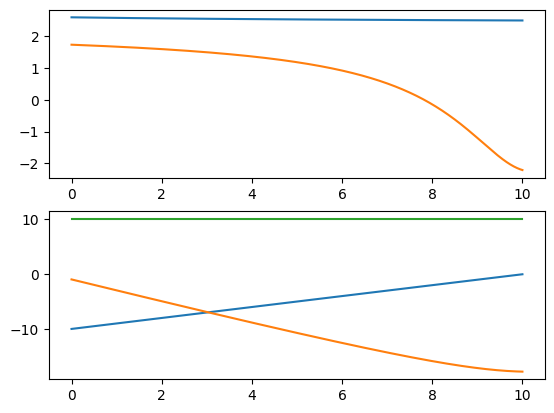

In [15]:
# Write your code here. We have provided the framework for a class particle to help, the rest is
# up to you!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class Particle:
    """A simple particle that can be updated to move with an electrostatic force"""
    def __init__(self, mass: float, charge: float, pos: float = 0.0, vel: float = 0.0, acc: float = 0.0):
        self.qSource = 1.0
        self.m = mass
        self.q = charge
        self.pos = pos
        self.vel = vel
        self.acc = acc
    
    def potential(self, source_position: float = -20.0, qO: int = 1 ) -> float:
        """Returns the electrostatic energy of the particle"""
        r = source_position-self.pos
        return self.qSource*self.q/(r)
    
    
    def kinetic( self ) -> float:
        """Returns the kinetic energy of the particle"""
        return 1/2 * self.m * self.vel**2
    
    
    def force(self, source_position: float = -20) -> float:
        """Returns the electrostatic force on the particle"""
        r = source_position - self.pos
        return self.qSource*self.q/((r)**2)

    
    def update(self, dt: float, source_position: float = -20, finish: float = 10) -> bool:
        """Changes the position, velocity and accelaration of the particle using a timestep.
        If the particle goes beyond the finish line, the function returns True, False 
        otherwise"""
        stop = False
        self.acc = self.force(source_position)/self.m
        self.vel = self.vel + self.acc*dt
        self.pos = self.pos + self.vel*dt + 0.5* self.acc*dt**2
        
        if self.pos >= finish :
            stop = True
        return stop

# Instantiate particle A and B
particle_A = Particle(mass=5, charge=-1, pos=-10, vel=1)
particle_B = Particle(mass=1, charge=5, pos=-1, vel=-2)
# create initial dictionary with values
dt = 0.01
time  = 0 
time_max = 10

data = []

while time < time_max and not False : 
    if int(time*10)%1==0:
        data.append({
            'time': time,
            'pos_A': particle_A.pos,
            'vel_A': particle_A.vel,
            'U_A': particle_A.potential(),
            'KE_A': particle_A.kinetic(),
            'pos_B': particle_B.pos,
            'vel_B': particle_B.vel,
            'U_B': particle_B.potential(),
            'KE_B': particle_B.kinetic(),
        })
    
    finished_A = particle_A.update(dt) 
    finished_B = particle_B.update(dt) 

    finished = finished_A or finished_B
    
    time+=dt
# ...the rest you need to do it by yourself!
df = pd.DataFrame(data)

df['Total E_A'] = df['U_A'] + df['KE_A']
df['Total E_B'] = df['U_B'] + df['KE_B']


fix,ax = plt.subplots(2,1)
ax[0].plot(df['time'],df['Total E_A'])
ax[0].plot(df['time'],df['Total E_B'])
ax[1].plot(df['time'],df['pos_A'])
ax[1].plot(df['time'],df['pos_B'])
ax[1].plot(df['time'],10+ df['time']*0)
plt.show()


print(int(1.901))

In [ ]:
# Write your code here. We have provided the framework for a class particle to help, the rest is
# up to you!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class Particle:
    """A simple particle that can be updated to move with an electrostatic force"""
    def __init__(self, mass: float, charge: float, pos: float = 0.0, vel: float = 0.0, acc: float = 0.0):
        self.qSource = 1.0
        self.m = mass
        self.q = charge
        self.pos = pos
        self.vel = vel
        self.acc = acc
    
    def potential(self, source_position: float = -20.0, qO: int = 1 ) -> float:
        """Returns the electrostatic energy of the particle"""
        return 
    
    
    def kinetic( self ) -> float:
        """Returns the kinetic energy of the particle"""
        return 
    
    
    def force(self, source_position: float = -20) -> float:
        """Returns the electrostatic force on the particle"""
        return 
    
    
    
    def update(self, dt: float, source_position: float = -20, finish: float = 10) -> bool:
        """Changes the position, velocity and accelaration of the particle using a timestep.
        If the particle goes beyond the finish line, the function returns True, False 
        otherwise"""
       
        stop = False
        #
        return stop

# Instantiate particle A and B

# create initial dictionary with values

# ...the rest you need to do it by yourself!